In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/formula-1-world-championship-1950-2020/races.csv
/kaggle/input/formula-1-world-championship-1950-2020/constructor_results.csv
/kaggle/input/formula-1-world-championship-1950-2020/drivers.csv
/kaggle/input/formula-1-world-championship-1950-2020/constructors.csv
/kaggle/input/formula-1-world-championship-1950-2020/lap_times.csv
/kaggle/input/formula-1-world-championship-1950-2020/status.csv
/kaggle/input/formula-1-world-championship-1950-2020/driver_standings.csv
/kaggle/input/formula-1-world-championship-1950-2020/seasons.csv
/kaggle/input/formula-1-world-championship-1950-2020/pit_stops.csv
/kaggle/input/formula-1-world-championship-1950-2020/sprint_results.csv
/kaggle/input/formula-1-world-championship-1950-2020/constructor_standings.csv
/kaggle/input/formula-1-world-championship-1950-2020/results.csv
/kaggle/input/formula-1-world-championship-1950-2020/circuits.csv
/kaggle/input/formula-1-world-championship-1950-2020/qualifying.csv


In [3]:
import pandas as pd
import zipfile
import os
import matplotlib.pyplot as plt
import warnings

# Suppress specific FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [4]:
# Define the paths to the uploaded files
file_paths = {
    "drivers": "/kaggle/input/formula-1-world-championship-1950-2020/drivers.csv",
    "constructors" : "/kaggle/input/formula-1-world-championship-1950-2020/constructors.csv",
    "lap_times": "/kaggle/input/formula-1-world-championship-1950-2020/lap_times.csv",
    "pit_stops": "/kaggle/input/formula-1-world-championship-1950-2020/pit_stops.csv",
    "qualifying": "/kaggle/input/formula-1-world-championship-1950-2020/qualifying.csv",
    "races": "/kaggle/input/formula-1-world-championship-1950-2020/races.csv",
    "results": "/kaggle/input/formula-1-world-championship-1950-2020/results.csv",
    "seasons": "/kaggle/input/formula-1-world-championship-1950-2020/seasons.csv",
    "sprint_results": "/kaggle/input/formula-1-world-championship-1950-2020/sprint_results.csv",
    "pit_stops": "/kaggle/input/formula-1-world-championship-1950-2020/pit_stops.csv",
    "driver_standings": "/kaggle/input/formula-1-world-championship-1950-2020/driver_standings.csv",
    "constructors_standings" : "/kaggle/input/formula-1-world-championship-1950-2020/constructor_standings.csv"
}

In [5]:
# Load each dataset into a dictionary of DataFrames
dataframes = {}
for name, path in file_paths.items():
    try:
        dataframes[name] = pd.read_csv(path)
    except Exception as e:
        dataframes[name] = None
        print(f"Error loading {name}: {e}")

# Display basic info about each dataset
info_summary = {name: df.info() if df is not None else f"{name} not loaded" for name, df in dataframes.items()}
info_summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 859 entries, 0 to 858
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   driverId     859 non-null    int64 
 1   driverRef    859 non-null    object
 2   number       859 non-null    object
 3   code         859 non-null    object
 4   forename     859 non-null    object
 5   surname      859 non-null    object
 6   dob          859 non-null    object
 7   nationality  859 non-null    object
 8   url          859 non-null    object
dtypes: int64(1), object(8)
memory usage: 60.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   constructorId   212 non-null    int64 
 1   constructorRef  212 non-null    object
 2   name            212 non-null    object
 3   nationality     212 non-null    object
 4   url             212 n

{'drivers': None,
 'constructors': None,
 'lap_times': None,
 'pit_stops': None,
 'qualifying': None,
 'races': None,
 'results': None,
 'seasons': None,
 'sprint_results': None,
 'driver_standings': None,
 'constructors_standings': None}

In [6]:
# Load necessary datasets into DataFrames
drivers_df = dataframes['drivers']
constructors_df = dataframes["constructors"]
lap_times_df = dataframes['lap_times']
results_df = dataframes['results']
races_df = dataframes['races']
races_df = races_df[races_df['year'] >= 2001]
pit_stops = dataframes["pit_stops"]
qualifying_df = dataframes['qualifying']
driver_standings = dataframes['driver_standings']
constructors_standings = dataframes['constructors_standings']

# Drivers performance in 2023

In [7]:
races_2023 = list(races_df[races_df['year']==2023]['raceId'])
driver_standings_2023_df = pd.DataFrame()

for i in races_2023:
    driver_standings_2023 = driver_standings[driver_standings["raceId"]==i]
    driver_standings_2023_df = pd.concat([driver_standings_2023_df,driver_standings_2023], ignore_index=True)
driver_standings_2023_df.sample(5)

,driverStandingsId,raceId,driverId,points,position,positionText,wins
297,72283,1113,822,6.0,15,15,0
34,71904,1099,844,6.0,8,8,0
331,72362,1115,817,0.0,22,22,0
154,72069,1106,832,68.0,5,5,0
200,72146,1109,830,281.0,1,1,9


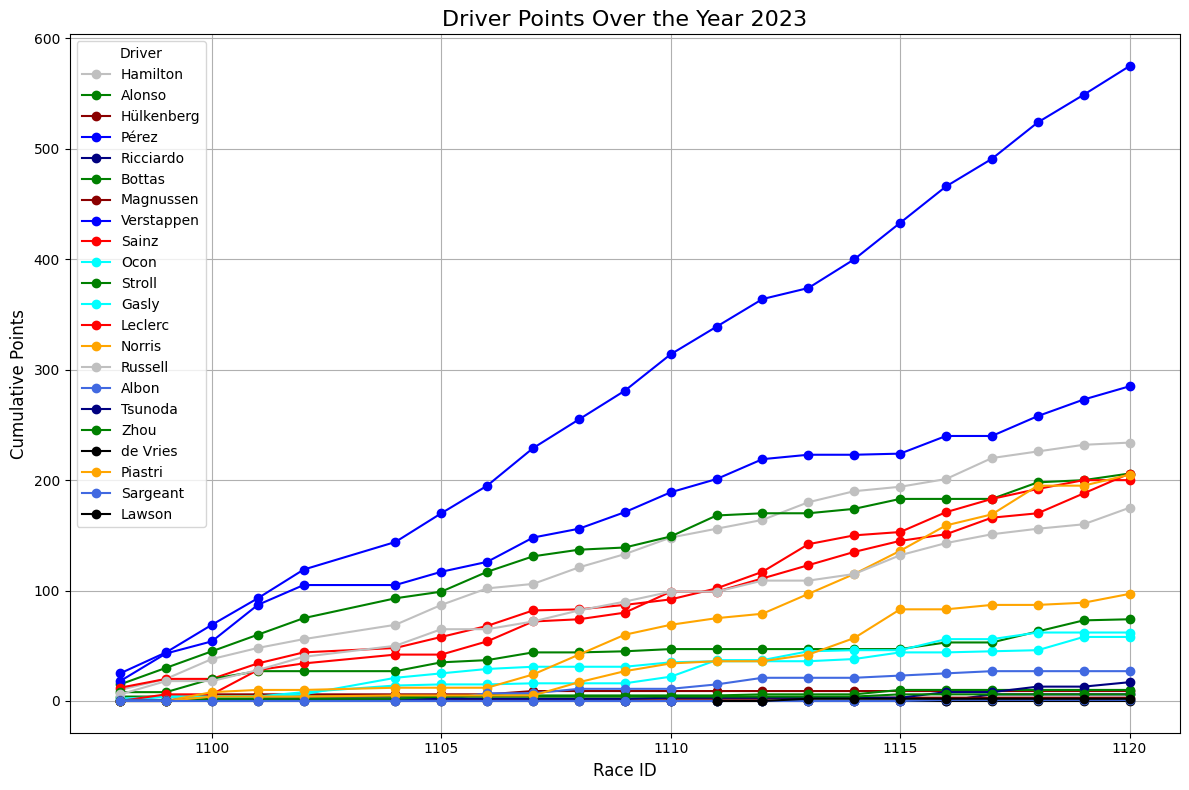

In [8]:
# Sort data by raceId
df = driver_standings_2023_df.sort_values(by='raceId')

# Team mapping (driverId -> teamName)
team_mapping = {
    830: 'Red Bull', 815: 'Red Bull', 1: 'Mercedes', 847: 'Mercedes', 844: 'Ferrari', 832: 'Ferrari', 846: 'McLaren', 857: 'McLaren', 
    4: 'Aston Martin', 840: 'Aston Martin', 842: 'Alpine', 839: 'Alpine', 852: 'AlphaTauri', 817: 'AlphaTauri',
    807: 'Haas', 825: 'Haas', 848: 'Williams', 858: 'Williams', 855: 'Alfa Romeo', 822: 'Alfa Romeo',
}

# Assign colors for teams
team_colors = {
    'Red Bull': 'blue',
    'Mercedes': 'silver',
    'Ferrari': 'red',
    'McLaren': 'orange',
    'Aston Martin': 'green',
    'Alpine': 'cyan',
    'AlphaTauri': 'navy',
    'Haas': 'darkred',
    'Williams': 'royalblue',
    'Alfa Romeo': 'green'
}

# Plot cumulative points for each driver
plt.figure(figsize=(12, 8))

for driver_id, driver_data in df.groupby('driverId'):
    driver_name = list(drivers_df[drivers_df['driverId']==driver_id]['surname'])[0]
    team_name = team_mapping.get(driver_id, 'Unknown Team')  # Get the driver's team
    color = team_colors.get(team_name, 'black')  # Get the team's color
    plt.plot(driver_data['raceId'], driver_data['points'], label=driver_name, marker='o', color = color)

# Customize the plot
plt.title("Driver Points Over the Year 2023", fontsize=16)
plt.xlabel("Race ID", fontsize=12)
plt.ylabel("Cumulative Points", fontsize=12)
plt.legend(title="Driver", fontsize=10, loc='upper left')
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()


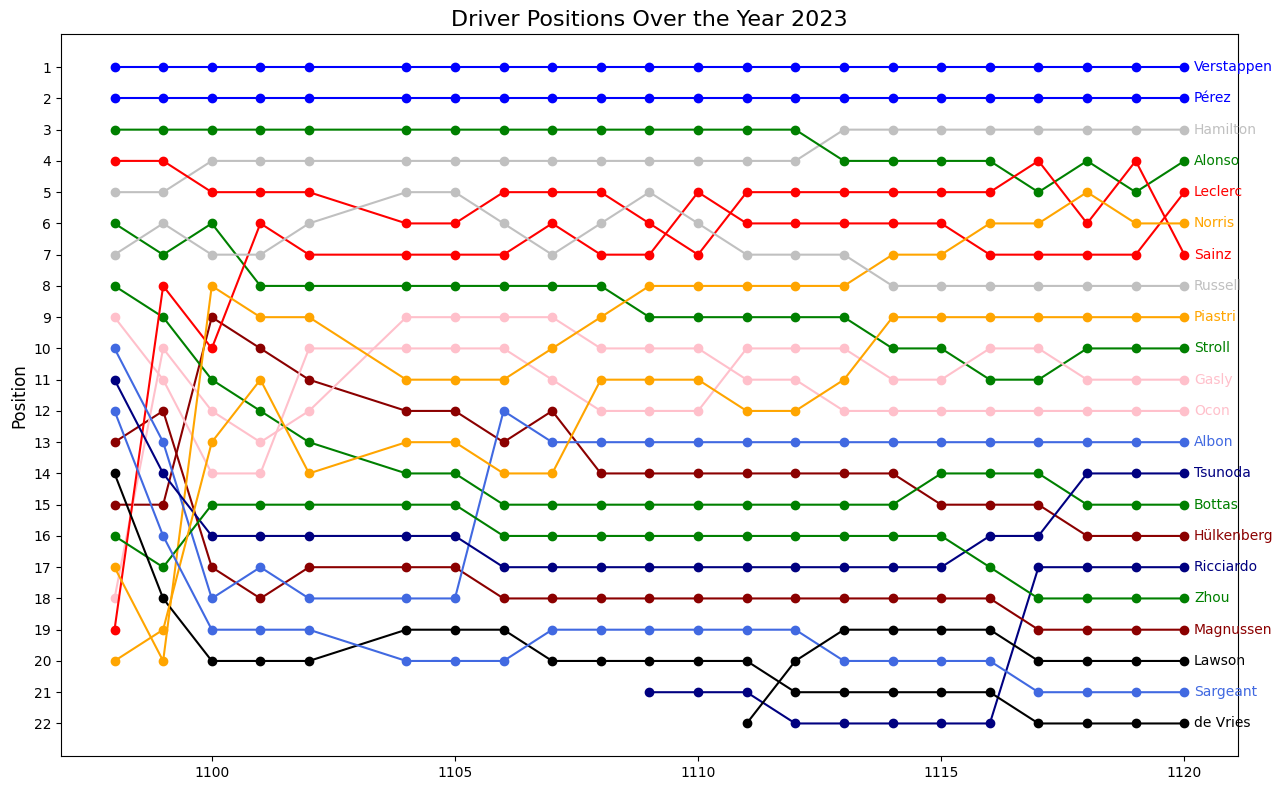

In [9]:
# Sort data by raceId
df = driver_standings_2023_df.sort_values(by='raceId')

# Team mapping (driverId -> teamName)
team_mapping = {
    830: 'Red Bull', 815: 'Red Bull', 1: 'Mercedes', 847: 'Mercedes', 844: 'Ferrari', 832: 'Ferrari',
    846: 'McLaren', 857: 'McLaren', 4: 'Aston Martin', 840: 'Aston Martin', 842: 'Alpine', 839: 'Alpine',
    852: 'AlphaTauri', 817: 'AlphaTauri', 807: 'Haas', 825: 'Haas', 848: 'Williams', 858: 'Williams',
    855: 'Alfa Romeo', 822: 'Alfa Romeo',
}

# Assign colors for teams
team_colors = {
    'Red Bull': 'blue',
    'Mercedes': 'silver',
    'Ferrari': 'red',
    'McLaren': 'orange',
    'Aston Martin': 'green',
    'Alpine': 'pink',
    'AlphaTauri': 'navy',
    'Haas': 'darkred',
    'Williams': 'royalblue',
    'Alfa Romeo': 'green',
}

# Plot positions for each driver
plt.figure(figsize=(13, 8))

for driver_id, driver_data in df.groupby('driverId'):
    # Get driver name and team
    driver_name = list(drivers_df[drivers_df['driverId'] == driver_id]['surname'])[0]
    team_name = team_mapping.get(driver_id, 'Unknown Team')
    color = team_colors.get(team_name, 'black')
    
    # Plot driver line with team color
    plt.plot(driver_data['raceId'], driver_data['position'], label=f'{driver_name}', marker='o', color=color)
    
    # Annotate driver name on the right side
    x = driver_data['raceId'].max()
    y = driver_data.loc[driver_data['raceId'] == x, 'position'].values[0]
    plt.text(x + 0.2, y, driver_name, fontsize=10, color=color, verticalalignment='center')

# Invert Y-axis to have championship leader (#1) on top
plt.gca().invert_yaxis()

# Set y-axis to start from 1 with an interval of 1
plt.yticks(range(1, df['position'].max() + 1))

# Customize the plot
plt.title("Driver Positions Over the Year 2023", fontsize=16)
plt.ylabel("Position", fontsize=12)

plt.legend().set_visible(False)

# Optimize layout
plt.tight_layout()

# Show the plot
plt.show()

# Constructors Performance in 2023

In [10]:
races_2023 = list(races_df[races_df['year']==2023]['raceId'])
constructors_standings_2023_df = pd.DataFrame()

for i in races_2023:
    constructors_standings_2023 = constructors_standings[constructors_standings["raceId"]==i]
    constructors_standings_2023_df = pd.concat([constructors_standings_2023_df,constructors_standings_2023], ignore_index=True)
constructors_standings_2023_df.sample(5)

,constructorStandingsId,raceId,constructorId,points,position,positionText,wins
196,28689,1118,3,28.0,7,7,0
160,28660,1115,213,5.0,10,10,0
204,28697,1119,51,16.0,9,9,0
109,28562,1109,1,87.0,5,5,0
127,28580,1111,213,3.0,10,10,0


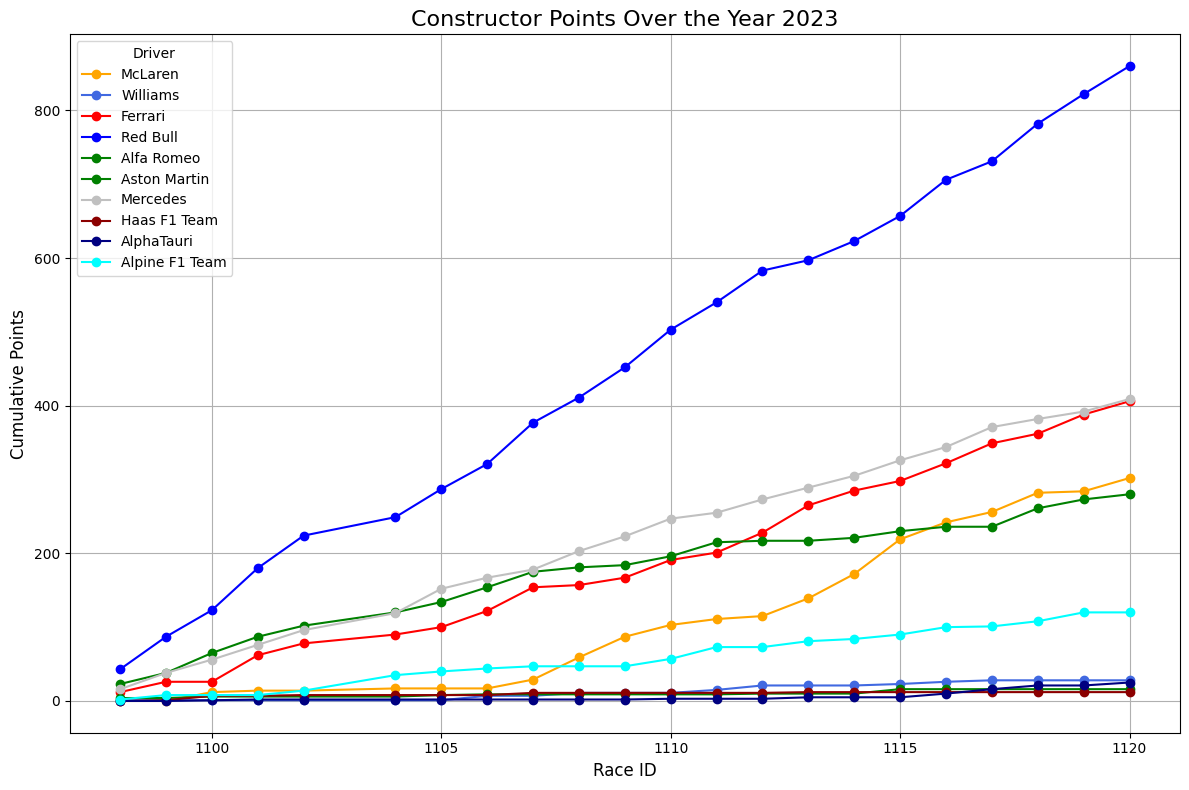

In [11]:
# Sort data by raceId
df = constructors_standings_2023_df.sort_values(by='raceId')
# Assign colors for teams
team_colors = {
    'Red Bull': 'blue',
    'Mercedes': 'silver',
    'Ferrari': 'red',
    'McLaren': 'orange',
    'Aston Martin': 'green',
    'Alpine F1 Team': 'cyan',
    'AlphaTauri': 'navy',
    'Haas F1 Team': 'darkred',
    'Williams': 'royalblue',
    'Alfa Romeo': 'green'
}

# Plot cumulative points for each driver
plt.figure(figsize=(12, 8))

for constructor_id, constructor_data in df.groupby('constructorId'):
    constructor_name = list(constructors_df[constructors_df['constructorId']==constructor_id]['name'])[0]
    color = team_colors.get(constructor_name, 'black') 
    plt.plot(constructor_data['raceId'], constructor_data['points'], label=constructor_name, marker='o', color = color)

# Customize the plot
plt.title("Constructor Points Over the Year 2023", fontsize=16)
plt.xlabel("Race ID", fontsize=12)
plt.ylabel("Cumulative Points", fontsize=12)
plt.legend(title="Driver", fontsize=10, loc='upper left')
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()

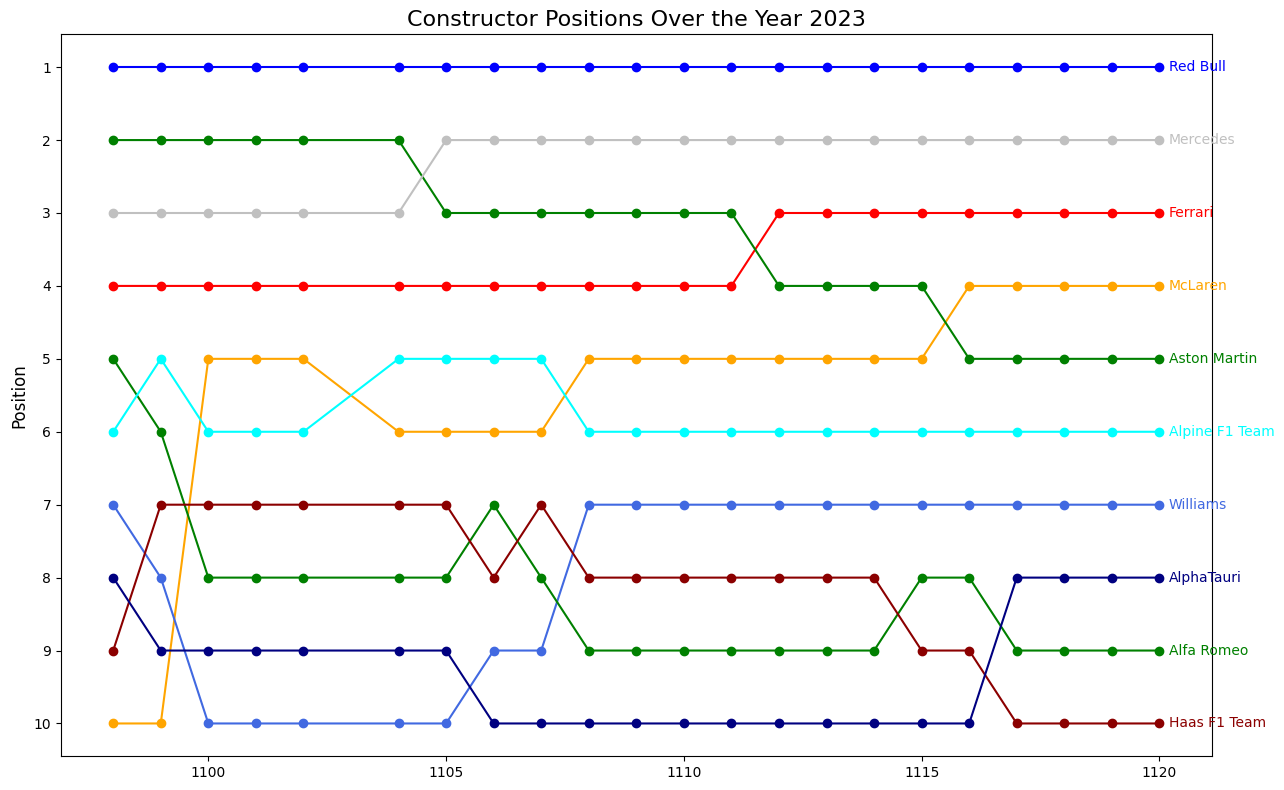

In [12]:
# Sort data by raceId
df = constructors_standings_2023_df.sort_values(by='raceId')

# Assign colors for teams
team_colors = {
    'Red Bull': 'blue',
    'Mercedes': 'silver',
    'Ferrari': 'red',
    'McLaren': 'orange',
    'Aston Martin': 'green',
    'Alpine F1 Team': 'cyan',
    'AlphaTauri': 'navy',
    'Haas F1 Team': 'darkred',
    'Williams': 'royalblue',
    'Alfa Romeo': 'green'
}

# Plot positions for each driver
plt.figure(figsize=(13, 8))

for constructor_id, constructor_data in df.groupby('constructorId'):
    # Get driver name and team
    constructor_name = list(constructors_df[constructors_df['constructorId'] == constructor_id]['name'])[0]
    color = team_colors.get(constructor_name, 'black')
    
    # Plot driver line with team color
    plt.plot(constructor_data['raceId'], constructor_data['position'], label=f'{constructor_name}', marker='o', color=color)
    
    # Annotate constructor name on the right side
    x = constructor_data['raceId'].max()
    y = constructor_data.loc[constructor_data['raceId'] == x, 'position'].values[0]
    plt.text(x + 0.2, y, constructor_name, fontsize=10, color=color, verticalalignment='center')

# Invert Y-axis to have championship leader (#1) on top
plt.gca().invert_yaxis()

# Set y-axis to start from 1 with an interval of 1
plt.yticks(range(1, df['position'].max() + 1))

# Customize the plot
plt.title("Constructor Positions Over the Year 2023", fontsize=16)
plt.ylabel("Position", fontsize=12)

plt.legend().set_visible(False)

# Optimize layout
plt.tight_layout()

# Show the plot
plt.show()

# Performance in Spa over the years

In [ ]:
# Sort data by raceId
# Team mapping (driverId -> teamName)
team_mapping = {
    830: 'Red Bull', 815: 'Red Bull', 1: 'Mercedes', 847: 'Mercedes', 844: 'Ferrari', 832: 'Ferrari',
    846: 'McLaren', 857: 'McLaren', 4: 'Aston Martin', 840: 'Aston Martin', 842: 'Alpine', 839: 'Alpine',
    852: 'AlphaTauri', 817: 'AlphaTauri', 807: 'Haas', 825: 'Haas', 848: 'Williams', 858: 'Williams',
    855: 'Alfa Romeo', 822: 'Alfa Romeo',
}

# Assign colors for teams
team_colors = {
    'Red Bull': 'blue',
    'Mercedes': 'silver',
    'Ferrari': 'red',
    'McLaren': 'orange',
    'Aston Martin': 'green',
    'Alpine': 'pink',
    'AlphaTauri': 'navy',
    'Haas': 'darkred',
    'Williams': 'royalblue',
    'Alfa Romeo': 'green',
}

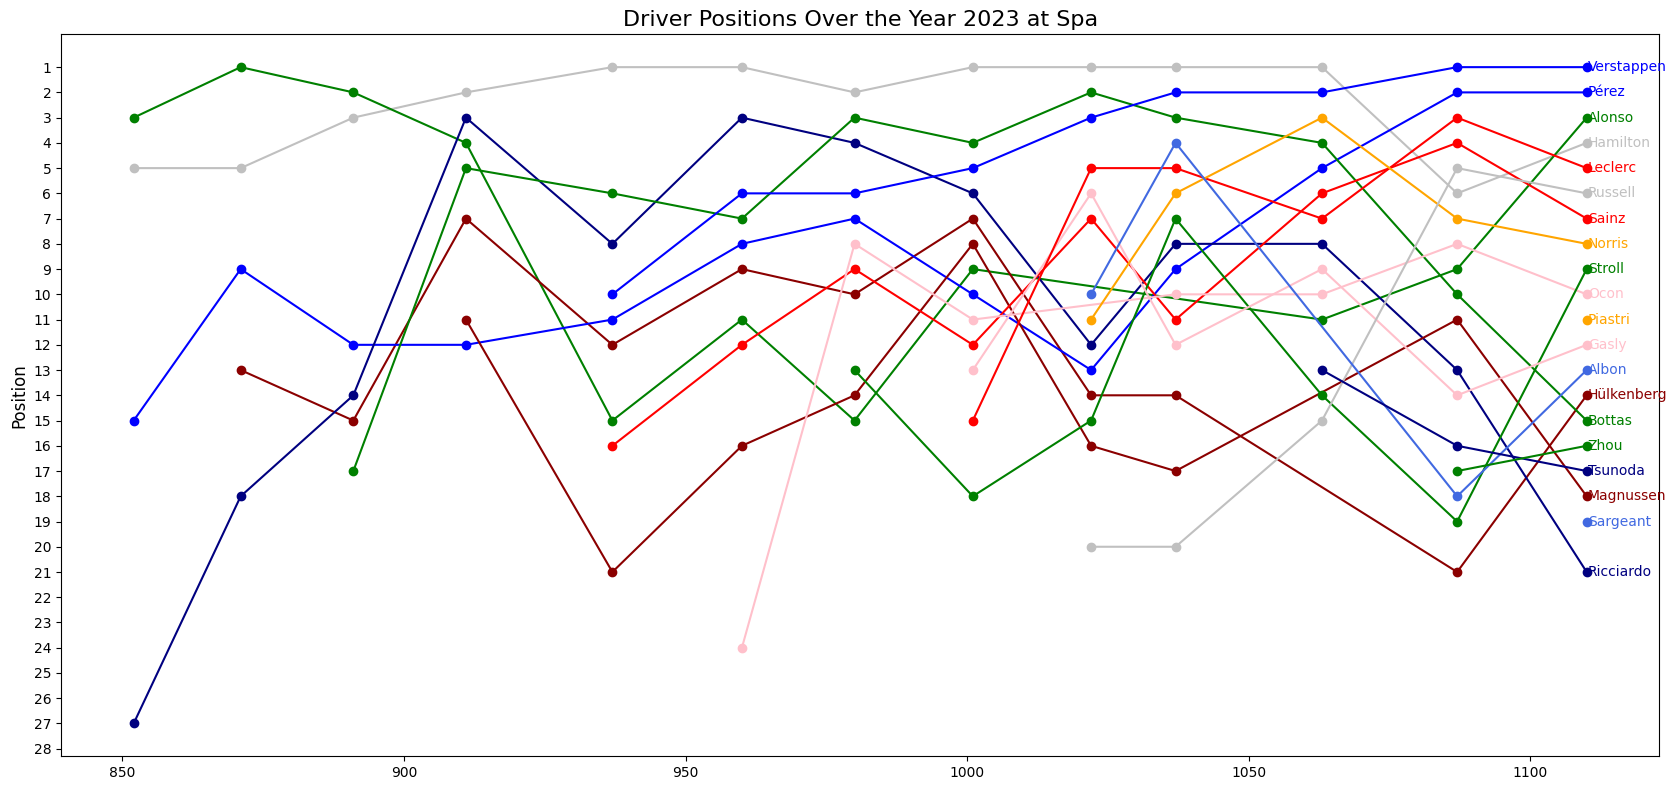

In [114]:
circuit_id = 13
races_spa = list(races_df[races_df['circuitId']==13]['raceId'])
spa_df = pd.DataFrame()


for i in races_spa:
    spa = driver_standings[driver_standings["raceId"]==i]
    spa_df = pd.concat([spa_df,spa], ignore_index=True)
del spa_df["points"]

current_drivers = [830, 815, 1, 847, 844, 832, 846, 857, 4, 840, 842, 839, 852, 817, 807, 825, 848, 858, 855, 822]
spa_current_df = pd.DataFrame()

for i in current_drivers:
    spa = spa_df[spa_df["driverId"]==i]
    spa_current_df = pd.concat([spa_current_df,spa], ignore_index=True)
spa_current_df = spa_current_df[spa_current_df["raceId"]>800]

# Plot positions for each driver
plt.figure(figsize=(17, 8))

for driver_id, driver_data in spa_current_df.groupby('driverId'):
    # Get driver name and team
    driver_name = list(drivers_df[drivers_df['driverId'] == driver_id]['surname'])[0]
    team_name = team_mapping.get(driver_id, 'Unknown Team')
    color = team_colors.get(team_name, 'black')
    
    # Plot driver line with team color
    plt.plot(driver_data['raceId'], driver_data['position'], label=f'{driver_name}', marker='o', color=color)
    
    # Annotate driver name on the right side
    x = driver_data['raceId'].max()
    y = driver_data.loc[driver_data['raceId'] == x, 'position'].values[0]
    plt.text(x + 0.2, y, driver_name, fontsize=10, color=color, verticalalignment='center')

# Invert Y-axis to have championship leader (#1) on top
plt.gca().invert_yaxis()

# Set y-axis to start from 1 with an interval of 1
plt.yticks(range(1, spa_df['position'].max() + 1))

# Customize the plot
plt.title("Driver Positions Over the Year 2023 at Spa", fontsize=16)
plt.ylabel("Position", fontsize=12)

plt.legend().set_visible(False)

# Optimize layout
plt.tight_layout()

# Show the plot
plt.show()

# Driver Stats

In [43]:
# Merge lap_times with results on driverId and raceId
lap_results_df = pd.merge(lap_times_df, results_df, on=["raceId", "driverId"])

# Merge with drivers to get driver names
driver_performance_df = pd.merge(lap_results_df, drivers_df, on="driverId")

# Merge with races to get season info
driver_performance_df = pd.merge(driver_performance_df, races_df[['raceId', 'year']], on="raceId")
driver_performance_df.rename(columns={'milliseconds_x': 'lap_times_milliseconds', 'milliseconds_y': 'results_milliseconds'}, inplace=True)
driver_performance_df.columns

Index(['raceId', 'driverId', 'lap', 'position_x', 'time_x',
       'lap_times_milliseconds', 'resultId', 'constructorId', 'number_x',
       'grid', 'position_y', 'positionText', 'positionOrder', 'points', 'laps',
       'time_y', 'results_milliseconds', 'fastestLap', 'rank',
       'fastestLapTime', 'fastestLapSpeed', 'statusId', 'driverRef',
       'number_y', 'code', 'forename', 'surname', 'dob', 'nationality', 'url',
       'year'],
      dtype='object')

# Fastest Lap Performance

In [177]:
fastest_laps_df = driver_performance_df[["fastestLap", "fastestLapSpeed", "driverId", "constructorId", "raceId", "year"]]
fastest_laps_df

,fastestLap,fastestLapSpeed,driverId,constructorId,raceId,year
0,44,212.488,20,9,841,2011
1,44,212.488,20,9,841,2011
2,44,212.488,20,9,841,2011
3,44,212.488,20,9,841,2011
4,44,212.488,20,9,841,2011
...,...,...,...,...,...,...
493431,2,204.191,27,18,79,2005
493432,2,204.191,27,18,79,2005
493433,2,204.191,27,18,79,2005
493434,2,204.191,27,18,79,2005


In [201]:
import pandas as pd

# Assuming fastest_laps_df, drivers_df, and constructors_df are loaded DataFrames
# Columns of interest in drivers_df: 'driverId', 'forename', 'surname'
# Columns of interest in constructors_df: 'constructorId', 'name'

# Filter out rows with missing values in key columns
df = fastest_laps_df.dropna(subset=['fastestLap', 'fastestLapSpeed', 'driverId', 'constructorId', 'year'])

# Replace non-numeric values in 'fastestLap' with NaN and drop them
df['fastestLap'] = pd.to_numeric(df['fastestLap'], errors='coerce')  # Coerce non-numeric values to NaN
df['fastestLapSpeed'] = pd.to_numeric(df['fastestLapSpeed'], errors='coerce')  # Coerce non-numeric values to NaN
df = df.dropna(subset=['fastestLap'])  # Drop rows with NaN in 'fastestLap'
df['fastestLap'] = df['fastestLap'].astype(int)  # Convert 'fastestLap' to integer

# Merge driver names into the DataFrame
df = df.merge(drivers_df[['driverId', 'forename', 'surname']], on='driverId', how='left')
df['driverName'] = df['forename'] + ' ' + df['surname']

# Merge constructor names into the DataFrame
df = df.merge(constructors_df[['constructorId', 'name']], on='constructorId', how='left')
df['constructorName'] = df['name']

# 1. Total Fastest Laps
fastest_laps_by_driver = df.groupby('driverName')['fastestLap'].count().sort_values(ascending=False)
fastest_laps_by_constructor = df.groupby('constructorName')['fastestLap'].count().sort_values(ascending=False)

# 2. Average Fastest Lap Speed
avg_speed_by_driver = df.groupby('driverName')['fastestLapSpeed'].mean().sort_values(ascending=False)
avg_speed_by_constructor = df.groupby('constructorName')['fastestLapSpeed'].mean().sort_values(ascending=False)

# 3. Fastest Lap Per Season
def most_fastest_laps(group):
    most_driver_id = group['driverId'].value_counts().idxmax()
    most_driver_name = drivers_df.loc[drivers_df['driverId'] == most_driver_id, 'forename'].iloc[0] + ' ' + drivers_df.loc[drivers_df['driverId'] == most_driver_id, 'surname'].iloc[0]
    return most_driver_name, group['driverId'].value_counts().max()

def most_fastest_laps_constructor(group):
    most_constructor_id = group['constructorId'].value_counts().idxmax()
    most_constructor_name = constructors_df.loc[constructors_df['constructorId'] == most_constructor_id, 'name'].iloc[0]
    return most_constructor_name, group['constructorId'].value_counts().max()

fastest_laps_per_season_driver = (
    df.groupby('year').apply(lambda group: most_fastest_laps(group)).rename("most_fastest_driver")
)
fastest_laps_per_season_constructor = (
    df.groupby('year').apply(lambda group: most_fastest_laps_constructor(group)).rename("most_fastest_constructor")
)

# Display Results
print("Total Fastest Laps by Driver:")
print(fastest_laps_by_driver)

print("\nTotal Fastest Laps by Constructor:")
print(fastest_laps_by_constructor)

print("\nAverage Fastest Lap Speed by Driver:")
print(avg_speed_by_driver)

print("\nAverage Fastest Lap Speed by Constructor:")
print(avg_speed_by_constructor)

print("\nFastest Laps Per Season (Driver):")
print(fastest_laps_per_season_driver)

print("\nFastest Laps Per Season (Constructor):")
print(fastest_laps_per_season_constructor)

Total Fastest Laps by Driver:
driverName
Lewis Hamilton       19508
Fernando Alonso      19442
Sebastian Vettel     16424
Kimi Räikkönen       16221
Sergio Pérez         14805
                     ...  
Marc Gené              130
Luca Badoer            100
Jack Aitken             87
Oliver Bearman          50
Markus Winkelhock       13
Name: fastestLap, Length: 105, dtype: int64

Total Fastest Laps by Constructor:
constructorName
Ferrari           44125
McLaren           42632
Williams          41959
Red Bull          40433
Mercedes          32791
Toro Rosso        26915
Renault           25603
Sauber            22954
Force India       21984
Haas F1 Team      18311
Alfa Romeo        11440
Toyota            11215
AlphaTauri         8862
Aston Martin       8483
Alpine F1 Team     8268
BMW Sauber         7936
Lotus F1           7496
Marussia           5786
Honda              5592
Caterham           5523
HRT                5321
Racing Point       4153
Manor Marussia     4076
Jordan        

In [16]:
# Select and clean necessary columns for analysis
driver_performance_df = driver_performance_df[["driverId", "code", "forename", "surname", "year", "raceId", "lap", "lap_times_milliseconds", "positionOrder"]]

# Convert milliseconds to seconds for readability
driver_performance_df["lap_time_sec"] = driver_performance_df["lap_times_milliseconds"] / 1000

# Display a sample of the combined dataset
driver_performance_df.sample(10)

,driverId,code,forename,surname,year,raceId,lap,lap_times_milliseconds,positionOrder,lap_time_sec
371612,817,RIC,Daniel,Ricciardo,2024,1121,15,97070,13,97.070
424956,22,BAR,Rubens,Barrichello,2004,98,66,72221,2,72.221
27854,13,MAS,Felipe,Massa,2012,863,15,101083,9,101.083
356702,842,GAS,Pierre,Gasly,2023,1106,43,77406,12,77.406
86331,815,PER,Sergio,Pérez,2014,912,43,89314,7,89.314
404881,17,WEB,Mark,Webber,2003,113,13,71412,7,71.412
492444,840,STR,Lance,Stroll,2023,1115,49,87096,11,87.096
352705,846,NOR,Lando,Norris,2023,1102,23,93447,17,93.447
314005,846,NOR,Lando,Norris,2022,1082,12,79465,15,79.465
484670,55,\N,Jean,Alesi,2001,150,33,79418,12,79.418


# Circuit Italian Grand Prix Race Analysis

In [17]:
races_df_2020 = races_df[races_df["year"]>=2020]
italy = races_df_2020[races_df_2020["circuitId"]==14]
italian_races = list(italy["raceId"])
italian_performance_df = pd.DataFrame()
italian_pitstops_df = pd.DataFrame()

for i in italian_races:
    italian_pitstops = pit_stops[pit_stops['raceId'] == i]
    italian_pitstops_df = pd.concat([italian_pitstops_df, italian_pitstops], ignore_index=True)
    italian_performance = driver_performance_df[driver_performance_df['raceId'] == i]
    italian_performance_df = pd.concat([italian_performance_df, italian_performance], ignore_index=True)

In [18]:
current= [
    "HAM",  # Lewis Hamilton
    "RUS",  # George Russell
    "VER",  # Max Verstappen
    "PER",  # Sergio Perez
    "LEC",  # Charles Leclerc
    "SAI",  # Carlos Sainz
    "NOR",  # Lando Norris
    "PIA",  # Oscar Piastri
    "ALO",  # Fernando Alonso
    "STR",  # Lance Stroll
]

In [19]:
current_italian_performance_df = pd.DataFrame()
for i in current:
    italian_performance = italian_performance_df[italian_performance_df["code"]==i]
    current_italian_performance_df = pd.concat([current_italian_performance_df,italian_performance], ignore_index=True)
current_italian_performance_df

,driverId,code,forename,surname,year,raceId,lap,lap_times_milliseconds,positionOrder,lap_time_sec
0,1,HAM,Lewis,Hamilton,2020,1038,1,85914,7,85.914
1,1,HAM,Lewis,Hamilton,2020,1038,2,85265,7,85.265
2,1,HAM,Lewis,Hamilton,2020,1038,3,85539,7,85.539
3,1,HAM,Lewis,Hamilton,2020,1038,4,85372,7,85.372
4,1,HAM,Lewis,Hamilton,2020,1038,5,85541,7,85.541
...,...,...,...,...,...,...,...,...,...,...
1738,840,STR,Lance,Stroll,2023,1112,47,87267,16,87.267
1739,840,STR,Lance,Stroll,2023,1112,48,87590,16,87.590
1740,840,STR,Lance,Stroll,2023,1112,49,89467,16,89.467
1741,840,STR,Lance,Stroll,2023,1112,50,90661,16,90.661


In [20]:
# Calculate the average lap time for each driver grouped by race and year
average_lap_times_by_race = current_italian_performance_df.groupby(['driverId', 'code','year', 'raceId'])['lap_time_sec'].mean().reset_index()

# Rename columns for clarity
average_lap_times_by_race.columns = ['driverId','code', 'year', 'raceId', 'average_lap_time_sec']

# Display the result
average_lap_times_by_race.sample(5)

,driverId,code,year,raceId,average_lap_time_sec
10,815,PER,2023,1112,86.807980
4,4,ALO,2021,1065,93.048415
7,815,PER,2020,1038,121.684528
8,815,PER,2021,1065,92.794113
0,1,HAM,2020,1038,121.571717


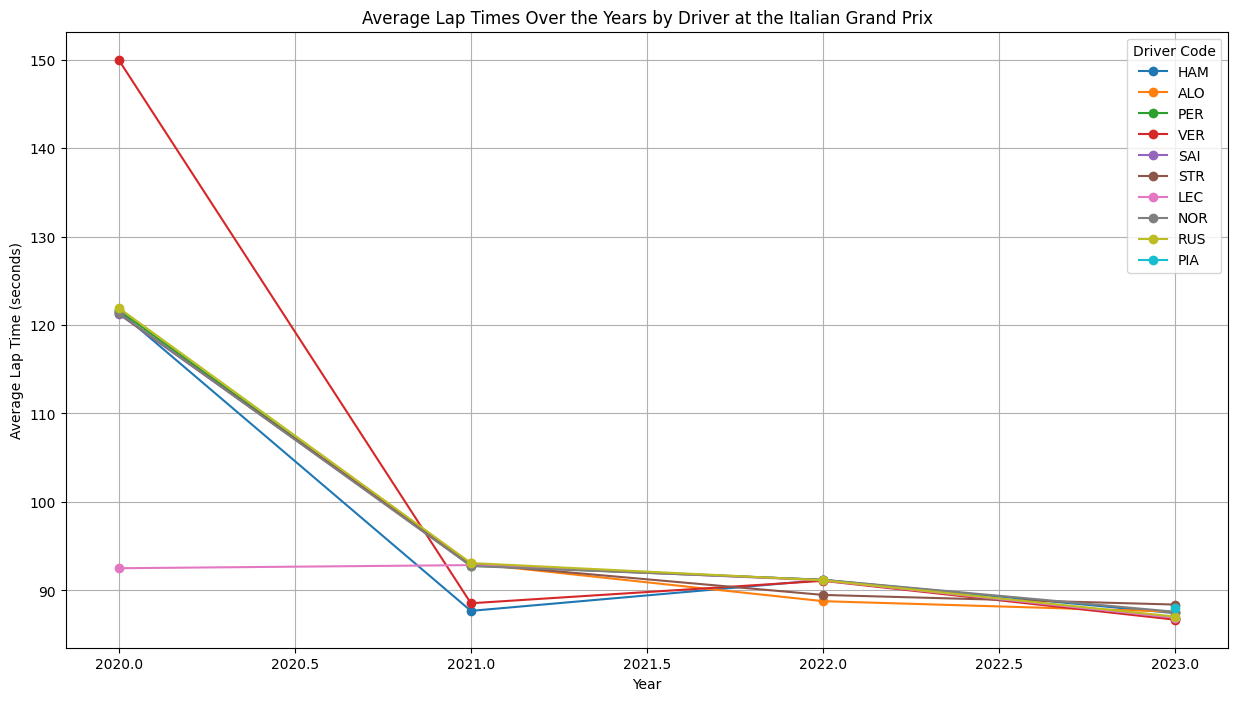

In [21]:
plt.figure(figsize=(15, 8))

# Prepare data for plotting
for driver_code in average_lap_times_by_race['code'].unique():
    driver_data = average_lap_times_by_race[average_lap_times_by_race['code'] == driver_code]
    plt.plot(driver_data['year'], driver_data['average_lap_time_sec'], marker='o', label=driver_code)

# Customize the plot
plt.xlabel('Year')
plt.ylabel('Average Lap Time (seconds)')
plt.title('Average Lap Times Over the Years by Driver at the Italian Grand Prix')
plt.legend(title="Driver Code")
plt.grid(True)

# Display the plot
plt.show()

# Lando Performance At Monaco Over the Years

In [22]:
monaco = races_df[races_df["circuitId"]==6]
monaco_races = list(monaco["raceId"])

In [23]:
# Initialize an empty DataFrame to store the results
monaco_performance_df = pd.DataFrame()
monaco_pitstops_df = pd.DataFrame()
monaco_qualifying_df = pd.DataFrame()

# Loop through each race in monaco_races and append the filtered data
for i in monaco_races:
    monaco_pitstops = pit_stops[pit_stops['raceId'] == i]
    monaco_pitstops_df = pd.concat([monaco_pitstops_df, monaco_pitstops], ignore_index=True)
    monaco_qualifying = qualifying_df[qualifying_df['raceId'] == i]
    monaco_qualifying_df = pd.concat([monaco_qualifying_df, monaco_qualifying], ignore_index=True)
    monaco_performance = driver_performance_df[driver_performance_df['raceId'] == i]
    monaco_performance_df = pd.concat([monaco_performance_df, monaco_performance], ignore_index=True)

In [24]:
monaco_pitstops_df.shape

(411, 7)

In [25]:
lando_monaco = monaco_performance_df[monaco_performance_df["code"]=="NOR"]
lando_pitstop = monaco_pitstops_df[monaco_pitstops_df["driverId"]==846]
lando_monaco.head()

,driverId,code,forename,surname,year,raceId,lap,lap_times_milliseconds,positionOrder,lap_time_sec
25568,846,NOR,Lando,Norris,2019,1015,1,93112,11,93.112
25569,846,NOR,Lando,Norris,2019,1015,2,81330,11,81.330
25570,846,NOR,Lando,Norris,2019,1015,3,79890,11,79.890
25571,846,NOR,Lando,Norris,2019,1015,4,79536,11,79.536
25572,846,NOR,Lando,Norris,2019,1015,5,79840,11,79.840


In [26]:
lando_pitstop.shape

(9, 7)

In [27]:
lando_monaco_quali = monaco_qualifying_df[monaco_qualifying_df["driverId"]==846]
lando_monaco_quali 

,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3
350,8069,1015,846,1,4,12,1:11.845,1:11.724,\N
363,8819,1056,846,1,4,5,1:11.321,1:11.031,1:10.620
382,9317,1080,846,1,4,5,1:12.927,1:12.266,1:11.849
407,9742,1104,846,1,4,10,1:12.877,1:12.377,1:12.254
421,10215,1128,846,1,4,4,1:11.760,1:10.732,1:10.542


<ipython-input-28-0ab428e6ffae>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lando_monaco_quali['q1_sec'] = lando_monaco_quali['q1'].apply(time_to_seconds)
<ipython-input-28-0ab428e6ffae>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lando_monaco_quali['q2_sec'] = lando_monaco_quali['q2'].apply(time_to_seconds)
<ipython-input-28-0ab428e6ffae>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

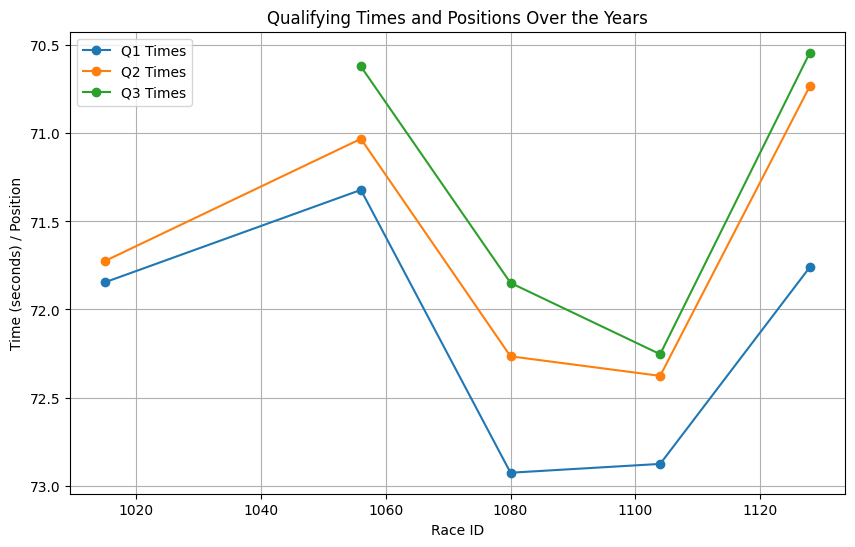

In [28]:
# Convert qualifying times to seconds for plotting
def time_to_seconds(t):
    if t is None or t == '\\N':
        return None
    minutes, seconds = t.split(':')
    return int(minutes) * 60 + float(seconds)

lando_monaco_quali['q1_sec'] = lando_monaco_quali['q1'].apply(time_to_seconds)
lando_monaco_quali['q2_sec'] = lando_monaco_quali['q2'].apply(time_to_seconds)
lando_monaco_quali['q3_sec'] = lando_monaco_quali['q3'].apply(time_to_seconds)

# Plot qualifying positions and times over the races
plt.figure(figsize=(10, 6))

# Plot Q1, Q2, and Q3 times
plt.plot(lando_monaco_quali['raceId'], lando_monaco_quali['q1_sec'], marker='o', label='Q1 Times')
plt.plot(lando_monaco_quali['raceId'], lando_monaco_quali['q2_sec'], marker='o', label='Q2 Times')
plt.plot(lando_monaco_quali['raceId'], lando_monaco_quali['q3_sec'], marker='o', label='Q3 Times')

# Customize plot
plt.xlabel('Race ID')
plt.ylabel('Time (seconds) / Position')
plt.title('Qualifying Times and Positions Over the Years')
plt.legend()
plt.grid(True)
plt.gca().invert_yaxis()  # Invert y-axis for position (lower numbers are better)

plt.show()

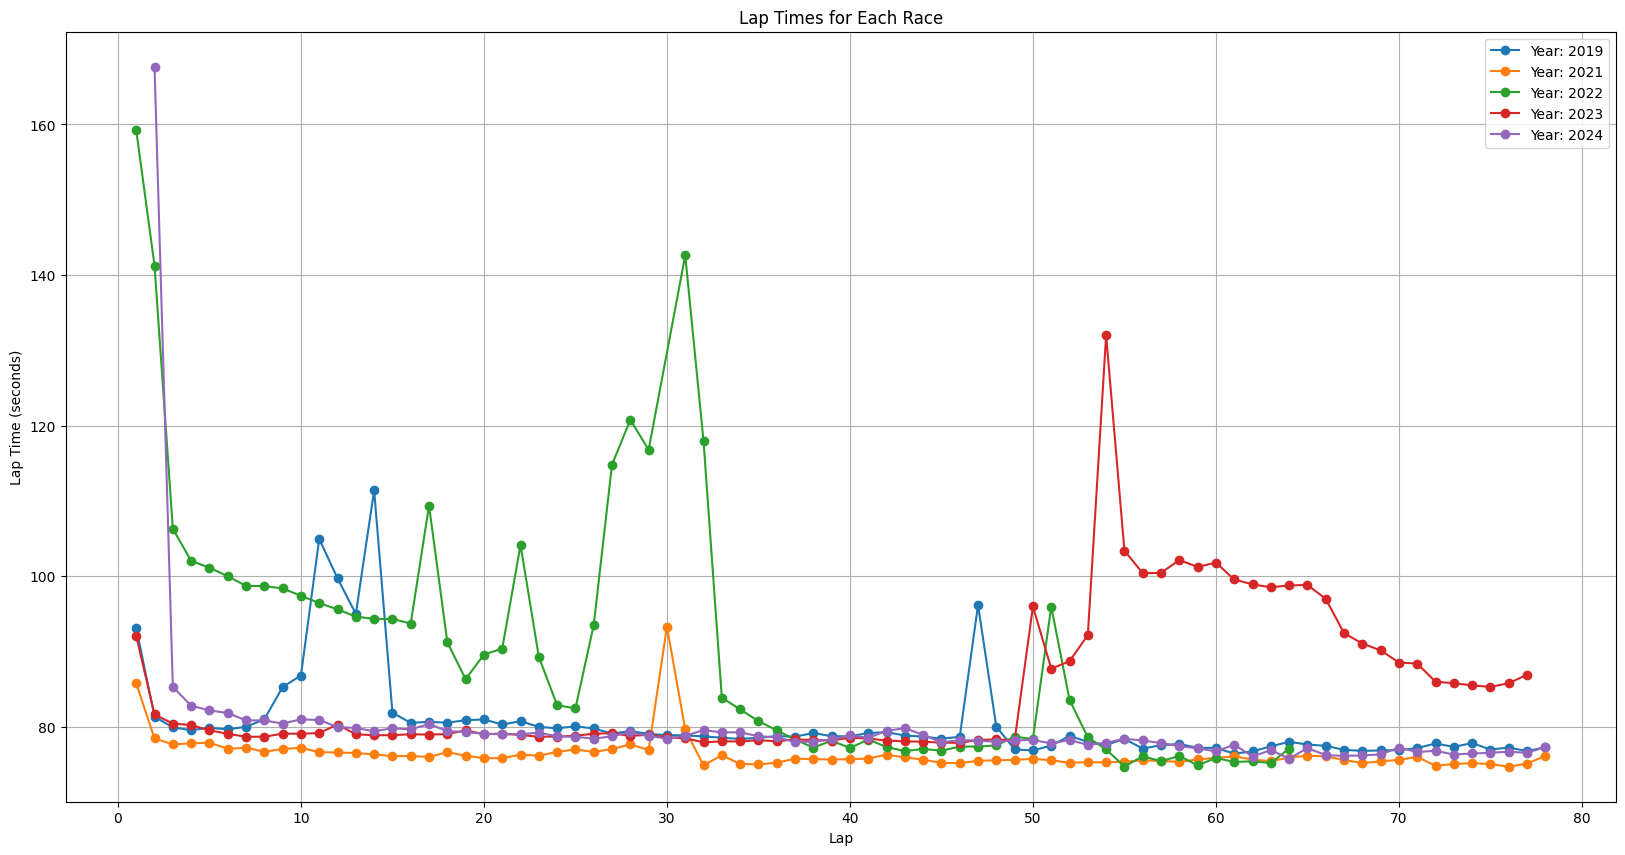

In [29]:
threshold = 500
# Filter out anomalies
lando_monaco = lando_monaco[lando_monaco['lap_time_sec'] <= threshold]

# Plot lap times for each race
plt.figure(figsize=(20, 10))

# Group data by raceId and plot lap times
for race_id, group in lando_monaco.groupby('year'):
    plt.plot(group['lap'], group['lap_time_sec'], marker='o', label=f'Year: {race_id}')

# Plot customization
plt.xlabel('Lap')
plt.ylabel('Lap Time (seconds)')
plt.title('Lap Times for Each Race')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

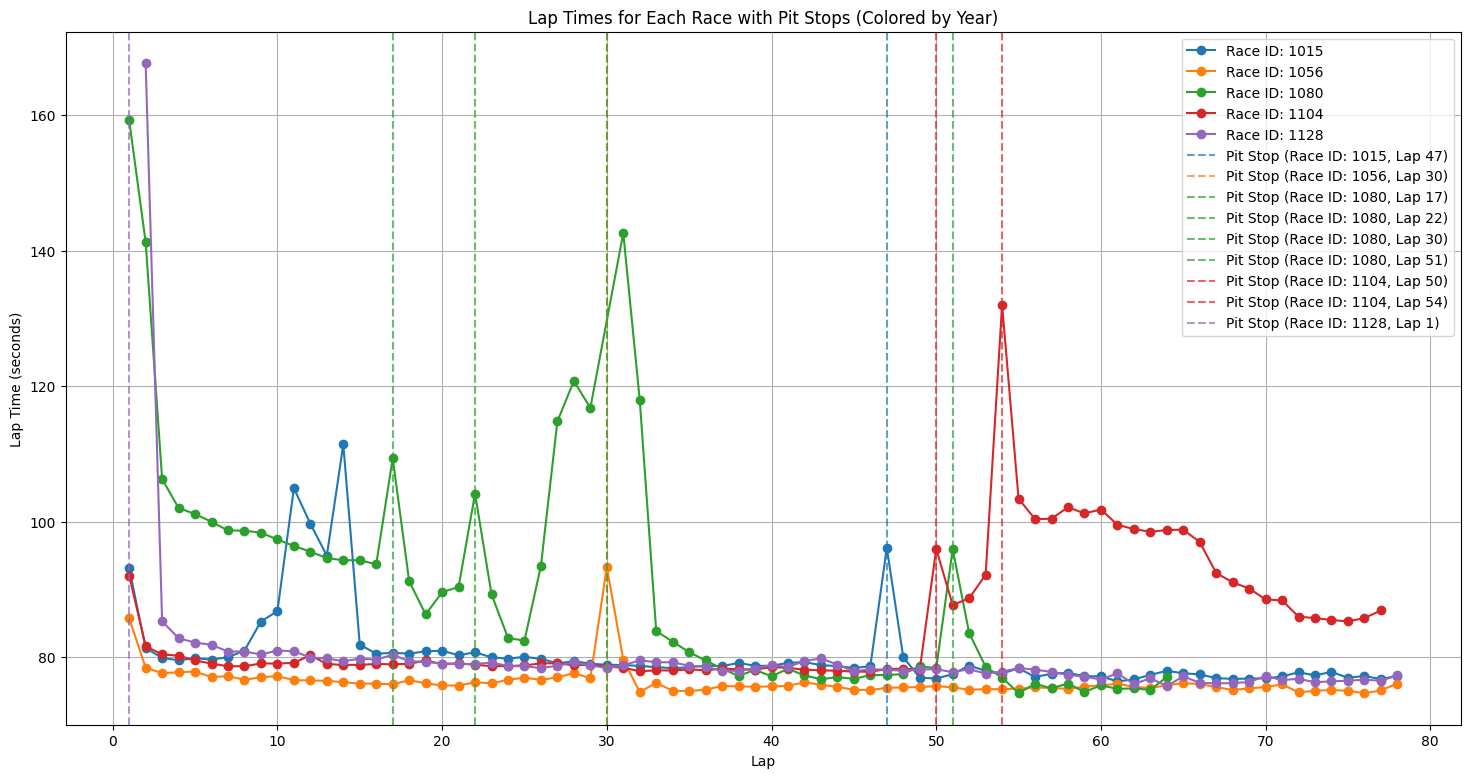

In [30]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Sample DataFrames (assuming these are already created: lap_df and pitstop_df)

# Generate unique colors for each pit stop year
unique_race_ids = lando_pitstop['raceId'].unique()
colors = list(mcolors.TABLEAU_COLORS.values())

# Plot lap times for each race
plt.figure(figsize=(18, 9))

# Plot lap times
for race_id, group in lando_monaco.groupby('raceId'):
    plt.plot(group['lap'], group['lap_time_sec'], marker='o', label=f'Race ID: {race_id}')

# Plot pit stops with different colors for each race
for i, (race_id, group) in enumerate(lando_pitstop.groupby('raceId')):
    color = colors[i % len(colors)]
    for _, row in group.iterrows():
        plt.axvline(x=row['lap'], color=color, linestyle='--', alpha=0.7, label=f'Pit Stop (Race ID: {race_id}, Lap {row["lap"]})')

# Customization
plt.xlabel('Lap')
plt.ylabel('Lap Time (seconds)')
plt.title('Lap Times for Each Race with Pit Stops (Colored by Year)')
plt.legend()
plt.grid(True)

# Show plot
plt.show()